<a href="https://colab.research.google.com/github/victorm0202/temas_selectos_DL/blob/main/rnn_text_seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

'2.6.0'

In [ ]:
#%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.6.0
Running on TPU  ['10.123.194.202:8470']
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.123.194.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.123.194.202:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# RNNs (F. Chollet)

## Vanilla RNN

`SimpleRNN` processes batches of sequences, this means that it takes inputs of shape `(batch_size, timesteps, input_features)`.

Like all recurrent layers in Keras, `SimpleRNN` can be run in two different modes: it can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`), or it can return only the last output for each 
input sequence (a 2D tensor of shape `(batch_size, output_features)`). These two modes are controlled by the `return_sequences` constructor argument. Let's take a look at an example:

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. 
In such a setup, you have to get all intermediate layers to return full sequences:

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Now let's try to use such a model on the IMDB movie review classification problem. First, let's preprocess the data:

In [ ]:
import numpy as np

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
(tr, y_tr), (te, y_te) = imdb.load_data(num_words=max_features)

In [10]:
input_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

Sobre Padding

In [5]:
x = [[1, 2, 3], [4, 5, 6, 7, 8], [9, 10]]
sequence.pad_sequences(x)

array([[ 0,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  8],
       [ 0,  0,  0,  9, 10]], dtype=int32)

In [6]:
x = [[1, 2, 3], [4, 5, 6, 7, 8], [9, 10]]
sequence.pad_sequences(x, maxlen=4, padding='pre', truncating='pre') #padding y truncating ='pre' es el default

array([[ 0,  1,  2,  3],
       [ 5,  6,  7,  8],
       [ 0,  0,  9, 10]], dtype=int32)

In [8]:
x = [[1, 2, 3], [4, 5, 6, 7, 8], [9, 10]]
sequence.pad_sequences(x, maxlen=4, padding='post', truncating='post')

array([[ 1,  2,  3,  0],
       [ 4,  5,  6,  7],
       [ 9, 10,  0,  0]], dtype=int32)

In [9]:
x = [[1, 2, 3], [4, 5, 6, 7, 8], [9, 10]]
sequence.pad_sequences(x, maxlen=4, padding='pre', truncating='pre', value=-1)

array([[-1,  1,  2,  3],
       [ 5,  6,  7,  8],
       [-1, -1,  9, 10]], dtype=int32)

Let's train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer:

In [ ]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(25,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 20s 118ms/step - loss: 0.6800 - acc: 0.5653 - val_loss: 0.5988 - val_acc: 0.7184
Epoch 2/10
157/157 [==============================] - 19s 120ms/step - loss: 0.4312 - acc: 0.8120 - val_loss: 0.5052 - val_acc: 0.7554
Epoch 3/10
157/157 [==============================] - 19s 122ms/step - loss: 0.2998 - acc: 0.8792 - val_loss: 0.3802 - val_acc: 0.8410
Epoch 4/10
157/157 [==============================] - 19s 122ms/step - loss: 0.2207 - acc: 0.9135 - val_loss: 0.3917 - val_acc: 0.8390
Epoch 5/10
157/157 [==============================] - 19s 123ms/step - loss: 0.1569 - acc: 0.9420 - val_loss: 0.4298 - val_acc: 0.8378
Epoch 6/10
157/157 [==============================] - 19s 122ms/step - loss: 0.0921 - acc: 0.9688 - val_loss: 0.5327 - val_acc: 0.8180
Epoch 7/10
157/157 [==============================] - 19s 122ms/step - loss: 0.0563 - acc: 0.9817 - val_loss: 0.6138 - val_acc: 0.8188
Epoch 8/10
157/157 [==============================] - 1

Let's display the training and validation loss and accuracy:

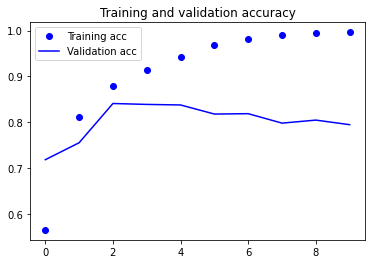

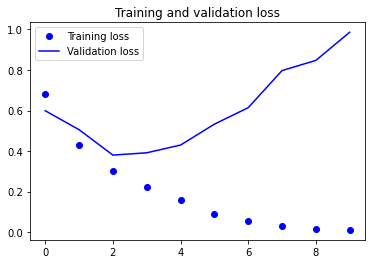

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## LSTM

Now let's switch to more practical concerns: we will set up a model using a LSTM layer and train it on the IMDB data. Here's the network, 
similar to the one with `SimpleRNN` that we just presented. We only specify the output dimensionality of the LSTM layer, and leave every 
other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without you 
having to spend time tuning parameters by hand.

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(25,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 40s 244ms/step - loss: 0.5147 - acc: 0.7542 - val_loss: 0.3117 - val_acc: 0.8776
Epoch 2/10
157/157 [==============================] - 39s 246ms/step - loss: 0.2789 - acc: 0.8881 - val_loss: 0.3471 - val_acc: 0.8540
Epoch 3/10
157/157 [==============================] - 38s 244ms/step - loss: 0.2308 - acc: 0.9108 - val_loss: 0.3411 - val_acc: 0.8754
Epoch 4/10
157/157 [==============================] - 32s 207ms/step - loss: 0.2006 - acc: 0.9240 - val_loss: 0.2799 - val_acc: 0.8896
Epoch 5/10
157/157 [==============================] - 37s 234ms/step - loss: 0.1711 - acc: 0.9367 - val_loss: 0.3244 - val_acc: 0.8586
Epoch 6/10
157/157 [==============================] - 33s 212ms/step - loss: 0.1555 - acc: 0.9449 - val_loss: 0.3105 - val_acc: 0.8762
Epoch 7/10
157/157 [==============================] - 37s 233ms/step - loss: 0.1361 - acc: 0.9529 - val_loss: 0.3664 - val_acc: 0.8864
Epoch 8/10
157/157 [==============================] - 3

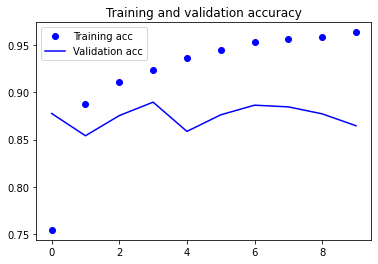

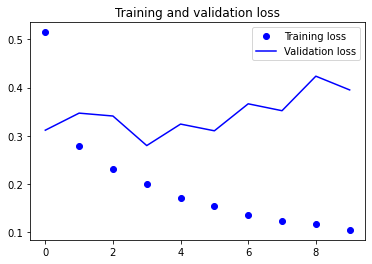

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Stack de LSTM

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(25,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                825       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 146s 885ms/step - loss: 0.5054 - acc: 0.7488 - val_loss: 0.4438 - val_acc: 0.8118
Epoch 2/10
157/157 [==============================] - 117s 747ms/step - loss: 0.3138 - acc: 0.8748 - val_loss: 0.3636 - val_acc: 0.8554
Epoch 3/10
157/157 [==============================] - 120s 766ms/step - loss: 0.2450 - acc: 0.9068 - val_loss: 0.3149 - val_acc: 0.8668
Epoch 4/10
157/157 [==============================] - 117s 742ms/step - loss: 0.2128 - acc: 0.9220 - val_loss: 0.2964 - val_acc: 0.8862
Epoch 5/10
157/157 [==============================] - 126s 805ms/step - loss: 0.1813 - acc: 0.9350 - val_loss: 0.3202 - val_acc: 0.8768
Epoch 6/10
157/157 [==============================] - 120s 764ms/step - loss: 0.1599 - acc: 0.9428 - val_loss: 0.3069 - val_acc: 0.8840
Epoch 7/10
157/157 [==============================] - 115s 730ms/step - loss: 0.1388 - acc: 0.9512 - val_loss: 0.4702 - val_acc: 0.8246
Epoch 8/10
157/157 [============================

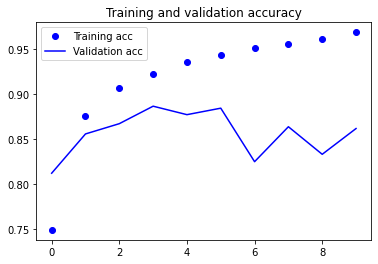

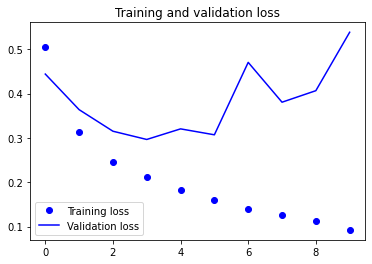

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## RNN bidireccional

Usaremos LSTM para éste ejemplo, pero puedes agregar otro tipo de RNN

In [ ]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Embedding(max_features, 32))
#model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(25,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
          
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1625      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 338,291
Trainable params: 338,291
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 46s 269ms/step - loss: 0.4761 - acc: 0.7645 - val_loss: 0.3132 - val_acc: 0.8700
Epoch 2/10
157/157 [==============================] - 38s 239ms/step - loss: 0.2735 - acc: 0.8911 - val_loss: 0.3013 - val_acc: 0.8788
Epoch 3/10
157/157 [==============================] - 40s 257ms/step - loss: 0.2289 - acc: 0.9137 - val_loss: 0.3669 - val_acc: 0.8536
Epoch 4/10
157/157 [==============================] - 38s 239ms/step - loss: 0.1920 - acc: 0.9299 - val_loss: 0.2928 - val_acc: 0.8834
Epoch 5/10
157/157 [==============================] - 38s 241ms/step - loss: 0.1685 - acc: 0.9377 - val_loss: 0.5231 - val_acc: 0.8218
Epoch 6/10
157/157 [==============================] - 36s 229ms/step - loss: 0.1520 - acc: 0.9451 - val_loss: 0.3114 - val_acc: 0.8846
Epoch 7/10
157/157 [==============================] - 38s 240ms/step - loss: 0.1355 - acc: 0.9513 - val_loss: 0.3549 - val_acc: 0.8868
Epoch 8/10
157/157 [==============================] - 4

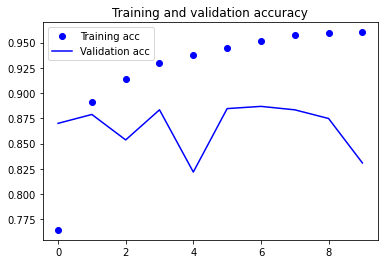

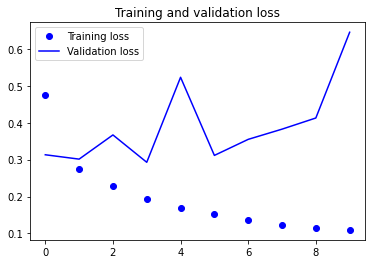

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

También puedes usar la definición forward-backward layer, que creo, es más clara

In [15]:
from keras.layers import LSTM, Bidirectional, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
forward_layer = LSTM(32, return_sequences=True)
backward_layer = LSTM(32, return_sequences=True, go_backwards=True)
model.add(Bidirectional(forward_layer, backward_layer=backward_layer))
model.add(Dense(25,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 64)          16640     
_________________________________________________________________
dense_1 (Dense)              (None, None, 25)          1625      
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           26        
Total params: 338,291
Trainable params: 338,291
Non-trainable params: 0
_________________________________________________________________
